In [1]:
# Лабораторна робота №3
# студента гарупи АнД-31
# Пивовара Володимира
# Варіант №9

# На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101
# Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0)
# у відсортованому за алфавітом наборі даних, n - номер за списком групи.
# Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
# Результати викласти у репозиторії GitHub (папка Lab5).
# Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

# Індекси за варіантом:
# i1 = n - 1 = 9 - 1 = 8
# i2 = n + 29 = 9 + 29 = 38
# i3 = n + 59 = 9 + 59 = 68

import zipfile

# Завантаження та відкриття .zip файлу
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

zip_ref = zipfile.ZipFile('101_food_classes_10_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-05-27 18:04:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   143MB/s    in 11s     

2022-05-27 18:05:02 (137 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



Класи за варіантом ['bread_pudding', 'fish_and_chips', 'onion_rings']


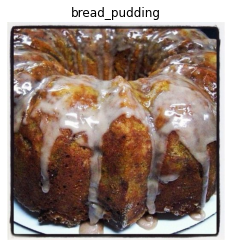

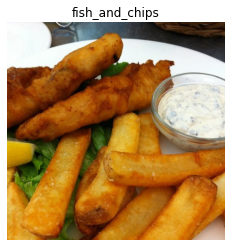

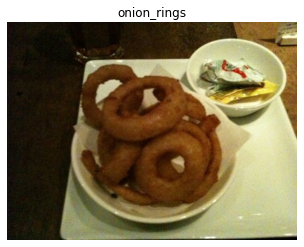

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

data_dir = pathlib.Path("101_food_classes_10_percent/train/")
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
choosen_classes = [classes[8], classes[38], classes[68]] # Беремо класи за варіантом (8, 38, 68)
print('Класи за варіантом', choosen_classes)

# Виводимо випадкове зображення з кожного класу
folder = ['101_food_classes_10_percent/train/' + choosen_classes[0], '101_food_classes_10_percent/train/' + choosen_classes[1], '101_food_classes_10_percent/train/' + choosen_classes[2]]

for i in range(len(choosen_classes)):
  random_image = random.sample(os.listdir(folder[i]), 1)
  img = mpimg.imread(folder[i] + "/" + random_image[0])
  plt.imshow(img)
  plt.title(choosen_classes[i])
  plt.axis('off');
  plt.show()

In [3]:
from pathlib import Path
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

for i in classes:
  if i not in choosen_classes:
    dirpath = Path(train_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path(test_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath) 

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.0)
valid_datagen = ImageDataGenerator(rescale = 1/255.0)

train_data = train_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                               batch_size = 32, class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                              batch_size = 32, class_mode = 'categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range = 20, width_shift_range = 0.2,
                                             height_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir, target_size = (224, 224),
                                                                   batch_size = 32, class_mode = 'categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [4]:
# Створення моделі і навчання
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_augmented, epochs = 20, steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data, validation_steps = len(test_data))

Epoch 1/20
24/24 [==============================] - 34s 1s/step - loss: 1.1738 - accuracy: 0.3707 - val_loss: 1.0527 - val_accuracy: 0.4311
Epoch 2/20
24/24 [==============================] - 34s 1s/step - loss: 1.0411 - accuracy: 0.4547 - val_loss: 1.1116 - val_accuracy: 0.4356
Epoch 3/20
24/24 [==============================] - 32s 1s/step - loss: 1.0354 - accuracy: 0.4640 - val_loss: 1.0087 - val_accuracy: 0.4933
Epoch 4/20
24/24 [==============================] - 33s 1s/step - loss: 0.9810 - accuracy: 0.5320 - val_loss: 1.0018 - val_accuracy: 0.5289
Epoch 5/20
24/24 [==============================] - 33s 1s/step - loss: 0.9723 - accuracy: 0.5440 - val_loss: 0.9786 - val_accuracy: 0.5333
Epoch 6/20
24/24 [==============================] - 33s 1s/step - loss: 0.9602 - accuracy: 0.5227 - val_loss: 0.9379 - val_accuracy: 0.5467
Epoch 7/20
24/24 [==============================] - 34s 1s/step - loss: 0.9629 - accuracy: 0.5320 - val_loss: 1.0107 - val_accuracy: 0.4800
Epoch 8/20
24/24 [==

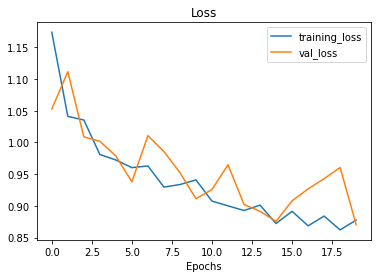

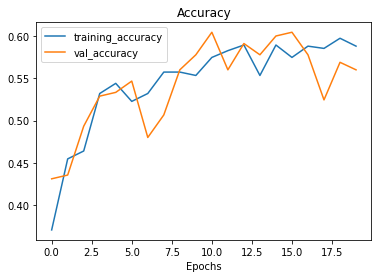

In [5]:
# Побудова графіків втрат і точності
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

# Loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [6]:
# Функції для розпізнавання зображень
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img / 255.0

  return img

def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

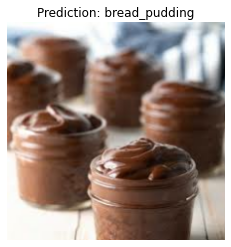

In [7]:
pred_and_plot(model, "1.jpg", choosen_classes)

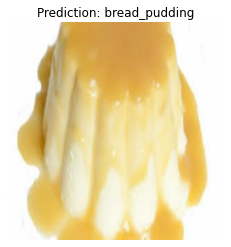

In [8]:
pred_and_plot(model, "2.jpg", choosen_classes)

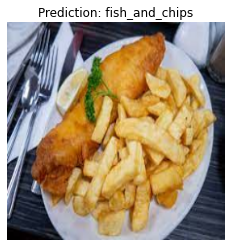

In [9]:
pred_and_plot(model, "3.jpg", choosen_classes)

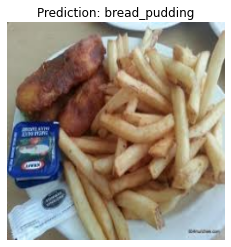

In [10]:
pred_and_plot(model, "4.jpg", choosen_classes)

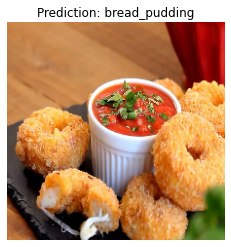

In [17]:
pred_and_plot(model, "5.jpg", choosen_classes)

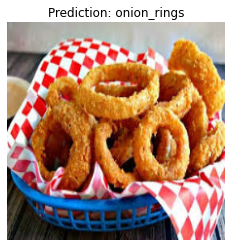

In [16]:
pred_and_plot(model, "6.jpg", choosen_classes)